# Midterm Question 2 Analysis 3

In [1]:
import requests    # Lib to import http request and response header from NYT site
import json          # Lib to handle json file format
import glob           # Lib to handle opening files and folders
from bs4 import BeautifulSoup as BS
import csv
from dateutil.parser import parse
import datetime
import matplotlib.pyplot as plt
import re

In [ ]:
#Code to fetch data from Artical Search , Artical Archieved and Most Popular APT
nyt_api = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'
#auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
auth_key = '7a3f07017a9f40c6b9de8bca324f455b'
q='travel'
begin_date = '19900101'               #change date to 20000101 
end_date = '19991231'                 #Change date to 20151231
date = 'begin_date=' + begin_date + '&' + 'end_date=' + end_date + '&'
page = 0                              #Maximum limit for pagination
pages=120

for i in range(0, pages):              # For loop to generated multiple pages
    page = i
    #url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+date+'page='+str(page)
    url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+'page='+str(page)
    response = requests.get(url)
    json.dump(response.json(), open("midterm/data/travel"+str(page)+".json",'w'))

#Most Popular API data fetching
auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
nyt_api = 'https://api.nytimes.com/svc/mostpopular/v2/mostviewed/travel/30.json'
url=nyt_api+'?'+'apikey='+ auth_key
response = requests.get(url)
json.dump(response.json(), open("midterm/data/travelM.json",'w'))

In [2]:
travel_file_list = glob.glob('midterm\\data\\travel\\*.json')           # Location where travel related artical data is stored
travel_details = []
#print(tech_file_list)

for t in travel_file_list:                                             # Looping through each file for fetching required data from
                                                                       # articals
    #print("processing "+t)
    with open(t) as json_file:
        data=json.load(json_file)
        temp = len(data["response"]['docs'])
        for i in range(temp):
            ID = data["response"]['docs'][i]['_id']
            lead_paragraph = data["response"]['docs'][i]['lead_paragraph']
            section_name = data["response"]['docs'][i]['section_name']
            word_count =  data["response"]['docs'][i]['word_count']
            pub_date = parse(data["response"]['docs'][i]['pub_date'])
            myDate =(pub_date.strftime('%Y/%m/%d'))
            travel_details.append([ID,lead_paragraph,section_name,word_count,myDate])

file = open('midterm\\data\\travel\\travelDetails.csv','w',newline='',encoding='utf-8')   # code to write list into CSV
writer =csv.writer(file)
writer.writerow(["ID","lead_paragraph","section_name","word_count","myDate"])
for x in travel_details:
    writer.writerow(x)

In [25]:
with open('midterm\\data\\travel\\country.txt','r') as f:   # THis list is downloaded from internet for set of world countires
    country = f.read().splitlines()
#rint(country)

In [26]:
country_stat =[]                   # List of countries with their name mentioned in respective artical year

popular_country ={}
for t in travel_details:
    mypara=str(t[1])
    mypara = re.sub(r'[^\w\s]','',mypara)        # Regex ti eliminated unwanted words
    mypara = mypara.split()
    year =t[4]
    t1 = parse(year)
    year=t1.strftime('%Y')
    for c in country:
        for m in mypara:
            if re.match(c, m):
                country_stat.append([c,year])
#print(country_stat)
# Unique years when articals are published

year_list =['1992','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2011','2012','2013','2015']


for c in country_stat:      # loopinng through each country and getting its frequency of occurrence
    temp=str(c[0])
    if temp not in popular_country:
        popular_country[temp]=1
    else:
        popular_country[temp]=popular_country[temp]+1
#print(popular_country)

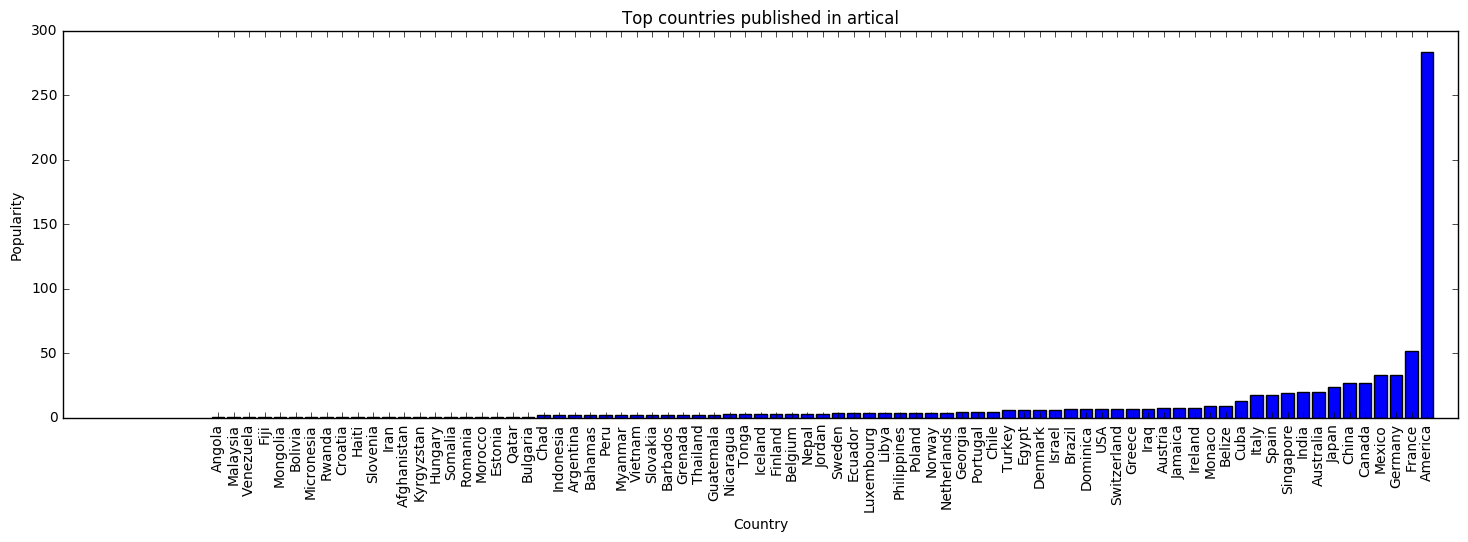

In [24]:
from pylab import rcParams                 # plotting a graph on cuntries and its popularity
rcParams['figure.figsize'] = 18, 5
plt.xlabel("Country")
plt.ylabel("Popularity")
plt.title('Top countries published in artical')

v1 = [x[1] for x in sorted(popular_country.items(), key = lambda t:t[1])]
v2 = [x[0] for x in sorted(popular_country.items(), key = lambda t:t[1])]


plt.bar(range(len(v1)), v1, align='center')
plt.xticks(range(len(v2)), v2,rotation='vertical')
plt.show()